## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Load Diabetes Data

In [2]:
data = pd.read_csv("Diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,NaN,33.6,0.627,50.0,1
1,1,85.0,66,29,NaN,26.6,0.351,31.0,0
2,8,183.0,64,0,NaN,23.3,0.672,32.0,1
3,1,89.0,66,23,94.0,28.1,0.167,21.0,0
4,0,137.0,40,35,168.0,43.1,2.288,33.0,1


## View Missing Values

In [3]:
# If the data uses '?' for missing values then we can replace them with a NaN
#data.replace('?', np.NaN, inplace=True)

# using isnull() function  
# View each column and how many missing values it has
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [4]:
data.shape

(768, 9)

In [ ]:
374/768

## Deal with Missing Values

In [5]:
## Insulin has a large number of missing values .. so we can drop that column
data = data.drop('Insulin', axis=1)

In [6]:
### Replace missing values in each column with the mean or median of that column
#data.fillna(data.mean(), inplace=True)
data.fillna(data.median(), inplace=True)

# Or drop rows with missing values
# data = data.dropna()

In [7]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Scatter Matrix

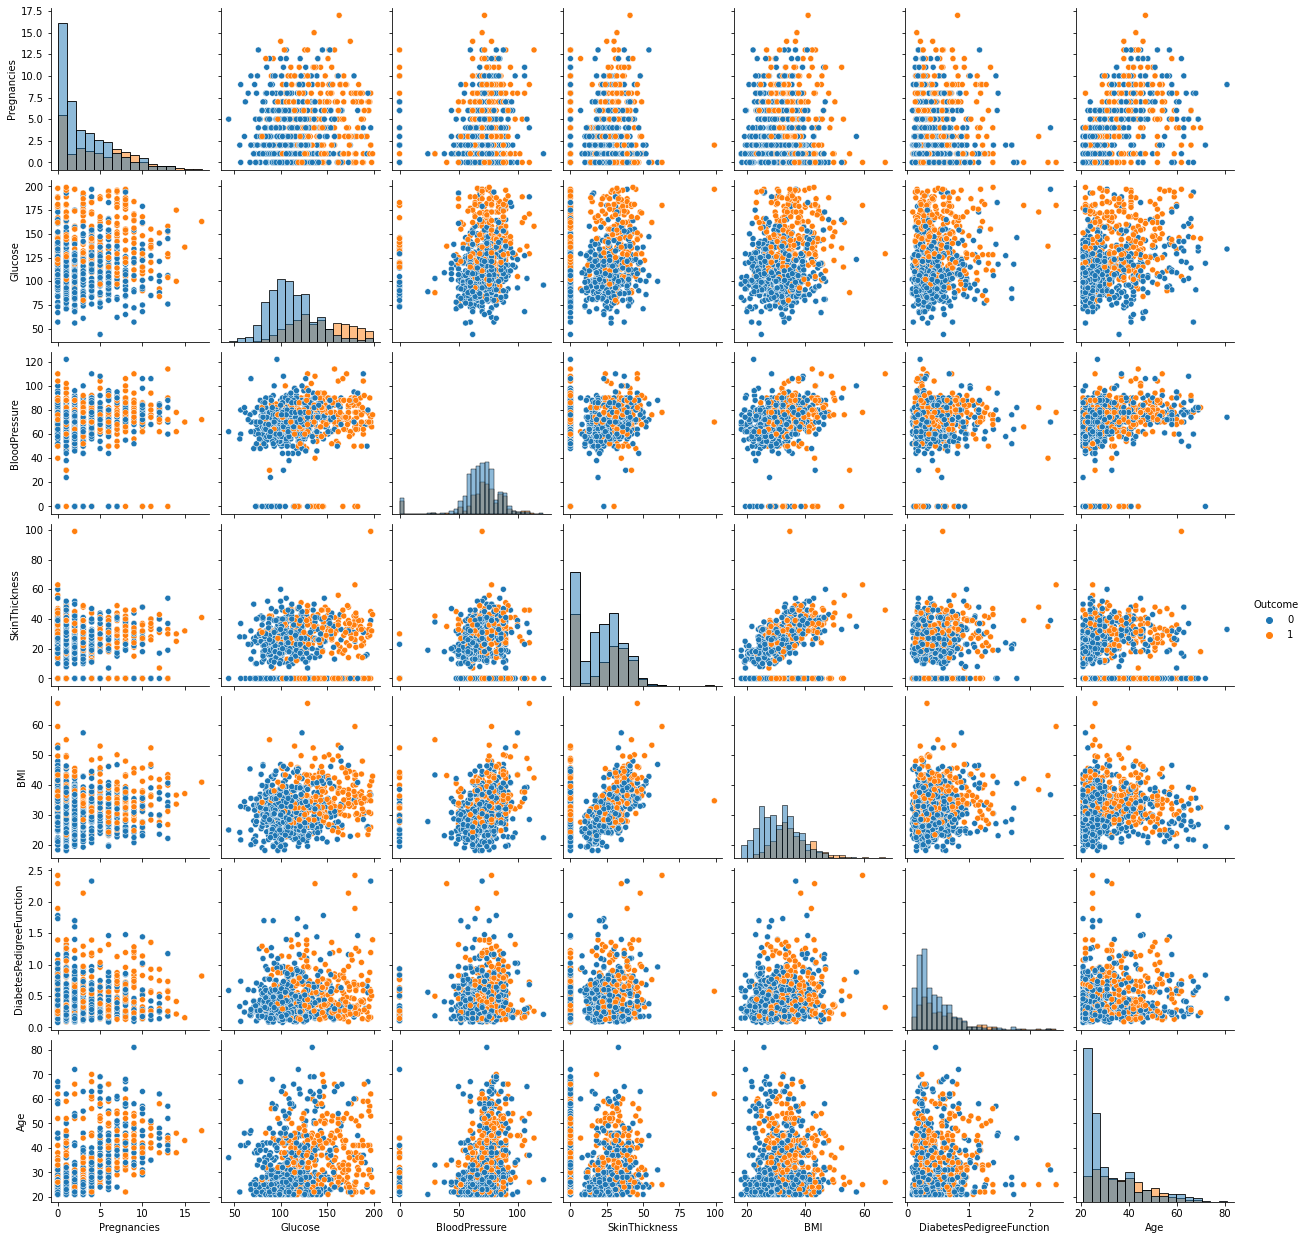

In [8]:
sns.pairplot(data, hue="Outcome", diag_kind = 'hist');

## Correlation Matrix

In [9]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.141282,-0.081672,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.158332,0.074455,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.141282,0.158332,1.000000,0.207371,0.182922,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.074455,0.207371,1.000000,0.381109,0.183928,-0.113970,0.074752
BMI,0.021559,0.231049,0.182922,0.381109,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,0.041265,0.183928,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.239528,-0.113970,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.065068,0.074752,0.312038,0.173844,0.238356,1.000000


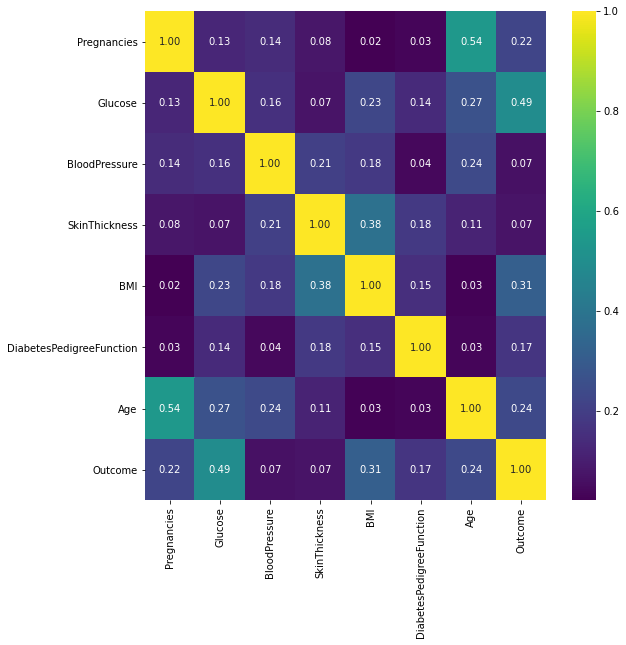

In [10]:
# annot true displays values in cells
# fmt = 2 digits rounding
# np.abs if not concerned with neagtive or positive correlation, just want to see strong correlation
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(data.corr()), annot=True, cmap="viridis", fmt="0.2f");

## Histogram Plots

<Figure size 432x288 with 0 Axes>

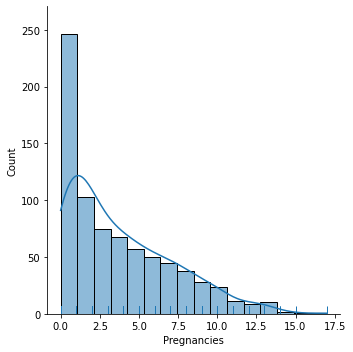

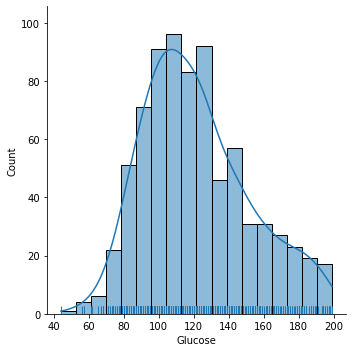

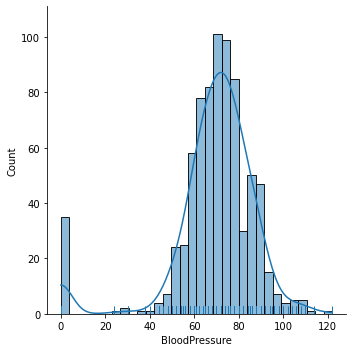

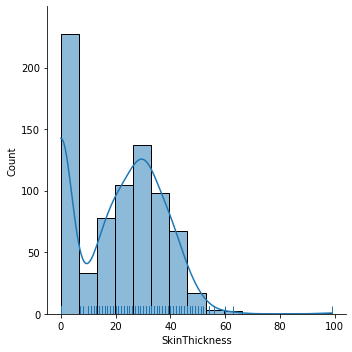

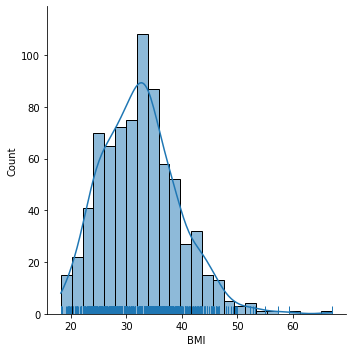

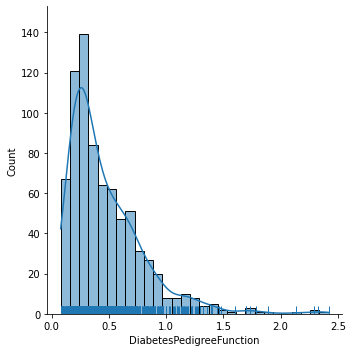

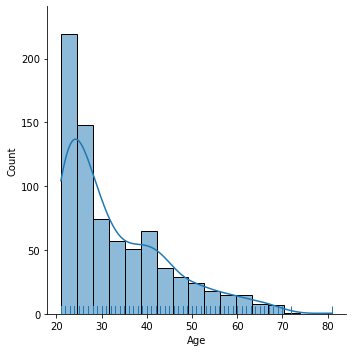

In [12]:
# https://seaborn.pydata.org/generated/seaborn.distplot.html
for i,col in enumerate(data.columns[:-1]):
    plt.figure(i)
    sns.displot(data[col], kde=True, rug=True);